# MNIST Using Keras and Convolution Neural Networs

Links:
* https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-3
* https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [4]:
# Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt

from PIL import Image

Using TensorFlow backend.


In [2]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [10]:
print(X_train.shape)

(60000, 28, 28)


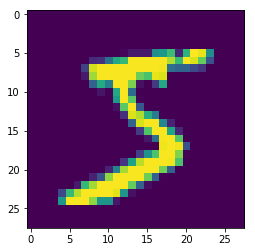

In [13]:
plt.imshow(X_train[0])

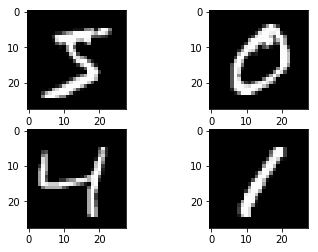

In [14]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

In [31]:
# Tensorflow backend needs reshape to samples, height, width, channels
# https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [32]:
X_train.shape

(60000, 28, 28, 1)

In [33]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [34]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [49]:
# Tensorflow backend input_shape=(samples, height, width, channels)
# https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d
# Model
model = Sequential()
model.add(Conv2D(30, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully connected to classify
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [50]:
# Compile
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
# Train
model.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          epochs=10,
          batch_size=200,
          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 42s 692us/step - loss: 1.5289 - acc: 0.4594 - val_loss: 0.6403 - val_acc: 0.8002
Epoch 2/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.6479 - acc: 0.7912 - val_loss: 0.4493 - val_acc: 0.8595
Epoch 3/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.5154 - acc: 0.8333 - val_loss: 0.3461 - val_acc: 0.8924
Epoch 4/10
60000/60000 [==============================] - 40s 658us/step - loss: 0.4285 - acc: 0.8631 - val_loss: 0.2847 - val_acc: 0.9127
Epoch 5/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.3640 - acc: 0.8836 - val_loss: 0.2429 - val_acc: 0.9306
Epoch 6/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.3092 - acc: 0.9024 - val_loss: 0.1989 - val_acc: 0.9396
Epoch 7/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.2618 - acc: 0.9188 - val_loss: 0.

In [52]:
# Evaluate
score = model.evaluate(X_test, Y_test, verbose=0)


In [1]:
print("CNN Error: %.2f%%" % (100-score[1]*100))

NameError: name 'score' is not defined

In [54]:
score

[0.10867025986984372, 0.9666]

In [55]:
model.metrics_names

['loss', 'acc']

In [36]:
img = Image.open("seven.png").convert('gray')

ValueError: conversion from RGB to gray not supported

In [30]:
x = np.array(img)

In [31]:
x.shape

(28, 28, 2)

In [34]:
x[4, 10]

array([  0, 255], dtype=uint8)

TypeError: Invalid dimensions for image data

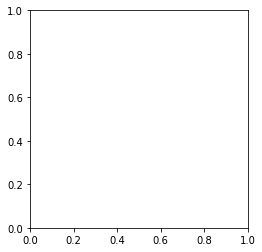

In [35]:
plt.imshow(x)

In [21]:
x[0][0]

array([255, 255, 255, 255], dtype=uint8)